In [1]:
import numpy as np
from scipy import stats
import sys
%load_ext autoreload
%autoreload 2
sys.path.append("/home/ebrahim/brainaudio/figure_data/")
from scipy import stats

from utils import one_sample_t_test, paired_t_test

In [2]:
baseline_ref = 9.76

--- Paired T-Test Results ---
Mean A: 9.3732
Mean B: 9.7105
Mean difference (A - B): -0.3373
T-statistic:    -4.58548
P-value:        0.00132

Conclusion: The difference is statistically significant (Reject H0).
A is significantly better than B.


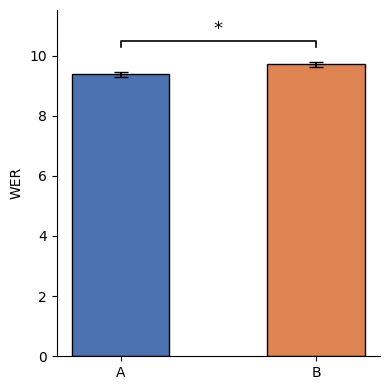

(np.float64(-4.585478527375399), np.float64(0.001317488396748739))

In [3]:
baseline_results = np.load("saved_data/baseline_5_gram_results.npy")
main_results = np.load("saved_data/main_results.npy")
paired_t_test(main_results, baseline_results)

In [4]:
one_sample_t_test(baseline_ref, main_results)

--- Results ---
Mean across seeds: 9.3732 (vs Baseline: 9.76)
T-statistic:    -4.93751
P-value:        0.00080

Conclusion: The difference is statistically significant (Reject H0).
Your model is significantly better than baseline.


In [5]:
baseline_results

array([ 9.406,  9.46 ,  9.811,  9.92 , 10.015,  9.852,  9.284,  9.585,
        9.947,  9.825])

### Abalation #1: Calling LLM only once at the end of decoding

In [6]:
val_scores = np.load("saved_data/val_scores.npy")
print(np.mean(val_scores), stats.sem(val_scores))

14.169 0.07425855730710985


--- Paired T-Test Results ---
Mean A: 17.1743
Mean B: 14.1690
Mean difference (A - B): 3.0053
T-statistic:    41.01201
P-value:        0.00000

Conclusion: The difference is statistically significant (Reject H0).
B is significantly better than A.


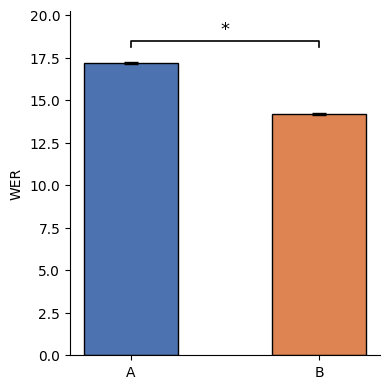

In [7]:
no_delayed_fusion_variants = np.load("saved_data/no_delayed_fusion_ablation.npy")*100
t, p = paired_t_test(no_delayed_fusion_variants, val_scores) 

### Abalation #2: No LLM Fine-tuning

In [ ]:
no_finetuning_variants = np.load("/saved_data/no_finetuning_ablation.npy")*100
t, p = paired_t_test(no_finetuning_variants, val_scores) 

### Abalation #3: No LLM Fine-tuning

In [ ]:
no_phoneme_variants = np.load("saved_data/no_variants_ablation.npy")*100
t, p =paired_t_test(no_phoneme_variants, val_scores)
